# Simple Linear Regression

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/package.csv')

In [ ]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


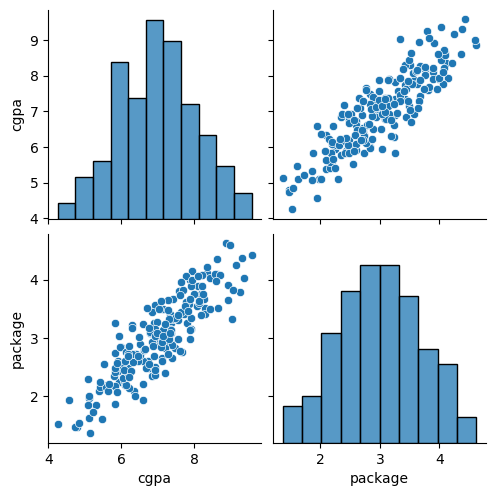

In [ ]:
sns.pairplot(df)

Text(0, 0.5, 'Package')

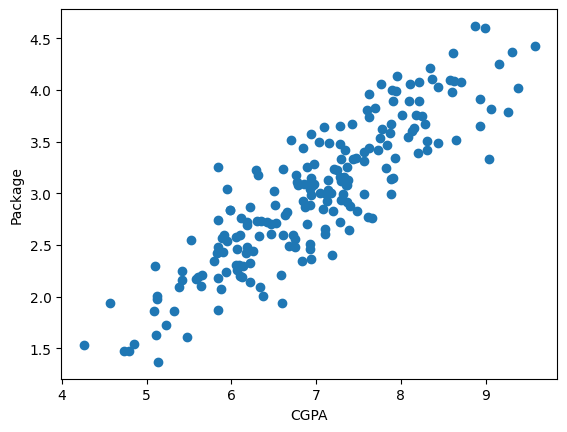

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [ ]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)

Text(0, 0.5, 'Package')

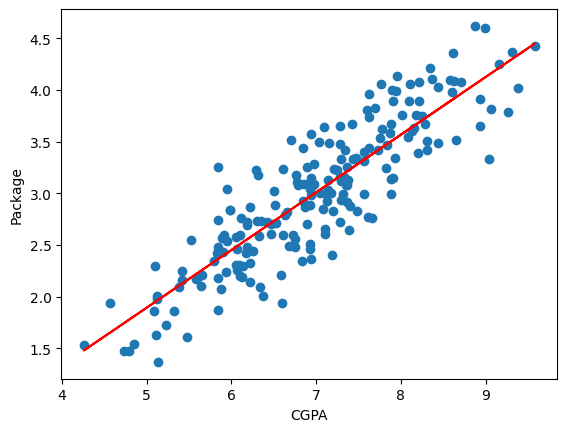

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train), c='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [ ]:
m=lr.coef_
m

array([0.55795197])

In [ ]:
b = lr.intercept_
b

-0.8961119222429144

In [ ]:
X_test.values

array([[8.58],
       [7.15],
       [5.88],
       [6.22],
       [4.57],
       [4.79],
       [5.32],
       [6.86],
       [8.35],
       [6.87],
       [8.94],
       [7.9 ],
       [6.93],
       [5.91],
       [7.32],
       [7.82],
       [5.09],
       [7.42],
       [6.94],
       [7.73],
       [6.19],
       [7.28],
       [6.73],
       [7.2 ],
       [8.21],
       [6.75],
       [7.87],
       [7.6 ],
       [8.63],
       [5.12],
       [8.15],
       [7.36],
       [8.31],
       [6.6 ],
       [6.59],
       [7.47],
       [7.93],
       [6.29],
       [6.37],
       [6.47]])

In [ ]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [ ]:
lr.predict([[8.58]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [ ]:
r2 = r2_score(y_test,y_pred)
print("R2-Score",r2)

R2-Score 0.780730147510384


# polynomial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score

In [ ]:
import numpy
import matplotlib.pyplot as plt
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

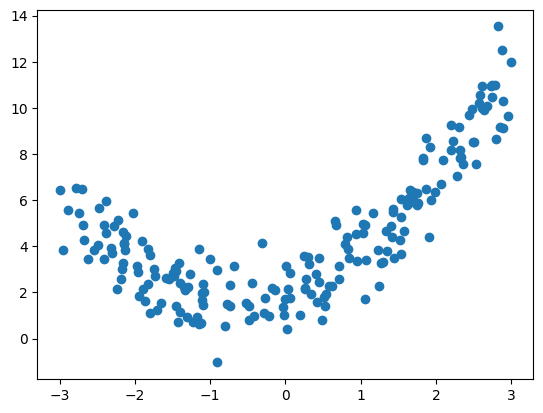

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#polynomial transformation
poly = PolynomialFeatures(degree=2,include_bias=True) #hyperparameter is degree

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
X_train_trans.shape
# x^0 + x^1 + x^2 as degree = 2

(160, 6)

In [ ]:
print(X_train[0])
print(X_train_trans[0])

[-1.82779575]
[  1.          -1.82779575   3.34083731  -6.10636823  11.16119391
 -20.4003828 ]


In [ ]:
# Applying Polynomial Linear Regression
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.          1.10394052  0.89368929 -0.03689359 -0.01822874  0.00174062]]
[1.95765087]


In [ ]:
y_pred = lr.predict(X_test_trans)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

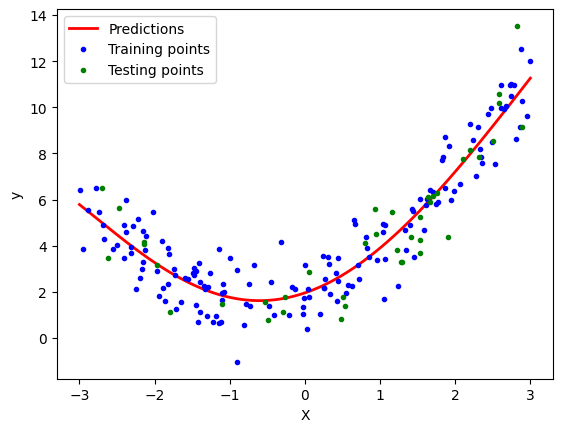

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

